In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd /content/drive/Shareddrives/FASTlab/PrestoColor2

[Errno 2] No such file or directory: '/content/drive/Shareddrives/FASTlab/PrestoColor2'
/global/u2/l/lianming/Presto-Color-2


In [127]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt

In [122]:
def Enquiry(HashTable, CoordinateDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = CoordinateDict['Bands'].index(Band1)
    Ind2 = CoordinateDict['Bands'].index(Band2)

    Ind3 = abs( dT1 - CoordinateDict['dT1s'] ).argmin()
    Ind4 = abs( dT2 - CoordinateDict['dT2s'] ).argmin()

    if dMag == None:
        Ind5 = None
    elif dMag<CoordinateDict['BinMag'][0] or dMag>=CoordinateDict['BinMag'][-1]:
        print('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(CoordinateDict['BinMag'][0], CoordinateDict['BinMag'][-1]))
        return
    else:
        Ind5 = np.where( dMag >= CoordinateDict['BinMag'] )[0][-1]

    if Color == None:
        Ind6 = None
    elif Color<CoordinateDict['BinColor'][0] or Color>=CoordinateDict['BinColor'][-1]:
        print('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(CoordinateDict['BinColor'][0], CoordinateDict['BinColor'][-1]))
        return
    else:
        Ind6 = np.where( Color >= CoordinateDict['BinColor'] )[0][-1]

    return HashTable[Ind1, Ind2, Ind3, Ind4, Ind5, Ind6]

In [152]:
with open('/content/drive/Shareddrives/FASTlab/PrestoColor2/Probability_Cube/ProbabilityCube_SNIa_1Slice0.1.pkl', 'rb') as f:
    EventNames = pickle.load(f)
    CoordinateDict = pickle.load(f)
    HashTable = pickle.load(f)

In [78]:
#Set the parameters: band1, band2, dT1, dT2, dMag, Color. The number of cases in the cell is returned.

Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450, 3.82, 0)

0

In [29]:
Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450, 0.04, 0)

34

In [151]:
CoordinateDict

{'Bands': ['u', 'g', 'r', 'i', 'z', 'Y'],
 'BinColor': array([-9.1, -8.9, -8.7, -8.5, -8.3, -8.1, -7.9, -7.7, -7.5, -7.3, -7.1,
        -6.9, -6.7, -6.5, -6.3, -6.1, -5.9, -5.7, -5.5, -5.3, -5.1, -4.9,
        -4.7, -4.5, -4.3, -4.1, -3.9, -3.7, -3.5, -3.3, -3.1, -2.9, -2.7,
        -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5,
        -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,
         1.9,  2.1,  2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,
         4.1,  4.3,  4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,
         6.3,  6.5,  6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,
         8.5,  8.7,  8.9,  9.1,  9.3,  9.5,  9.7]),
 'BinMag': array([-1.1 , -1.06, -1.02, -0.98, -0.94, -0.9 , -0.86, -0.82, -0.78,
        -0.74, -0.7 , -0.66, -0.62, -0.58, -0.54, -0.5 , -0.46, -0.42,
        -0.38, -0.34, -0.3 , -0.26, -0.22, -0.18, -0.14, -0.1 , -0.06,
        -0.02,  0.02,  0.06,  0.1 ,  0.14,  0.18,  0.22,  0.26,  0.3 ,
        

In [133]:
LogNorm(vmin=Map[0,0].min(), vmax=Map[0,0].max())

(-7.5, 4.0)

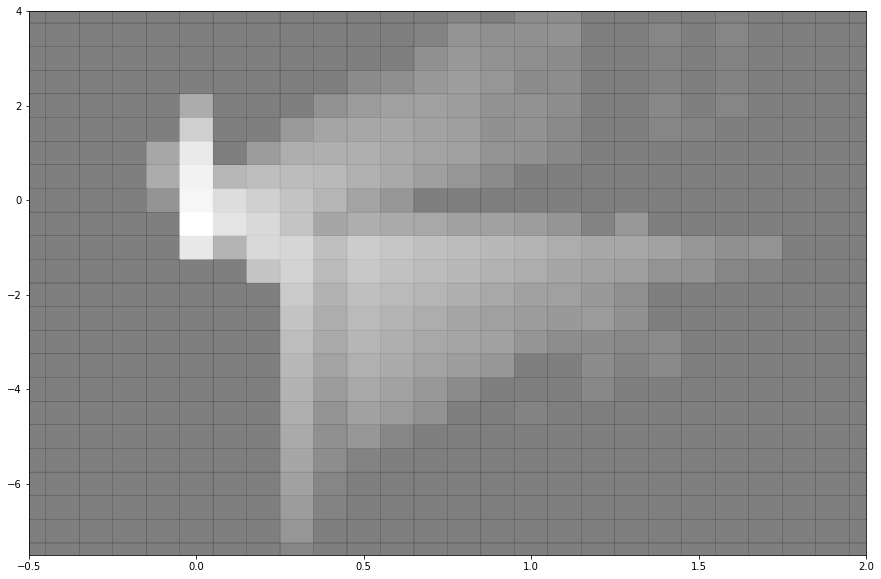

In [161]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

Map = Enquiry(HashTable, CoordinateDict, 'g', 'g', 60, 450)
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.5)
plt.xlim([-0.5, 2])
plt.ylim([-7.5, 4])
# plt.axis('equal')

In [147]:
HashTable.shape

(2, 2, 1, 1, 10, 38)

(-7.5, 4.0)

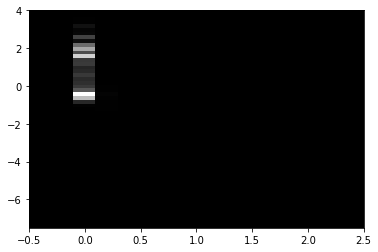

In [ ]:
#If dMag and Color are not given, a 2-D array will be returned.

Map = Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450)
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0]), cmap='gist_gray')
plt.xlim([-0.5, 2.5])
plt.ylim([-7.5, 4])
# plt.axis('equal')

In [16]:
data = CalculateMap('/content/drive/Shareddrives/FASTlab/PrestoColor2/Interpolated Data', 'SNIa-SALT2', 'g', 'i', 60, 450, PointsPDay=0.1)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Finish!


([<matplotlib.lines.Line2D at 0x7f3a8f9e22d0>],
 <matplotlib.contour.QuadContourSet at 0x7f3a8f9bdd50>)

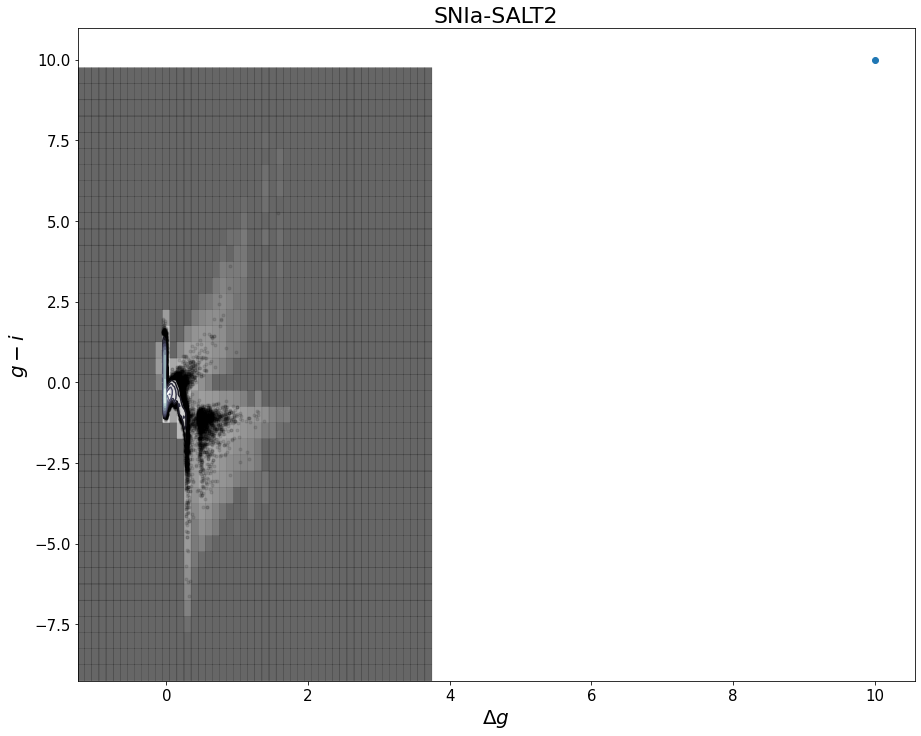

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.set_xlabel("$\Delta {0}$".format('g'), fontsize=20)
ax.set_ylabel('${0}-{1}$'.format('g','i'), fontsize=20)
ax.tick_params(labelsize=15 )
ax.set_title('SNIa-SALT2', fontsize=22)

plt.xlim([-0.3, 1.8])
plt.ylim([-7.5, 4])

plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.6)

ax.scatter([10], [10])

plotting.scatter_contour(data[0], data[1], 
                         threshold=50,log_counts=True, 
                         histogram2d_args=dict(bins=(100,100)), filled_contour=False,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))

In [15]:
def CalculateMap(PathInterp, EventName, Band1, Band2, dT1, dT2, PointsPDay = 50, Thr=27.5, Save=0, TargetFolder='MapData'):    
    
    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')
    
    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)    

    dMag = []
    Color = []

    for II in range(len(Interp_load[Band1])):
        
        if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
            continue
        
        if II%5000 == 4999:
            print('|')
        elif II%50 == 49:
            print('|', end='' )

        TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440 )
        TimeRangeEnd = min( TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

        TimeRange = TimeRangeEnd - TimeRangeStart
        SampleNo = np.int(PointsPDay*TimeRange)
        
        XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

        Mag1 = Interp_load[Band1][II](XX)
        Mag2 = Interp_load[Band2][II](XX+dT1/1440)
        Mag12 = Interp_load[Band1][II](XX+dT2/1440)

        Mask = (Mag1<Thr) * (Mag2<Thr) *(Mag12<Thr)

        dMag.extend(Mag1[Mask] - Mag12[Mask])
        Color.extend(Mag1[Mask] - Mag2[Mask])
        
    data = np.array([dMag, Color])
    
    if Save == 1:
    
        TargetPath = os.path.join(Path0, TargetFolder)                            
        if not os.path.isdir(TargetPath):
            os.mkdir(TargetPath)
        os.chdir(TargetPath)

        Ind1 = PathInterp.rfind('/')
        Ind2 = PathInterp.rfind('_')
        
        FileName = '{}{}_dT1_{}_dT2_{}_PPD{}_Thr{}_{}_Source_{}.npy'.format(Band1, Band2, dT1, dT2, PointsPDay, Thr, EventName, PathInterp[Ind1+1:Ind2])
        np.save(FileName, data)
        
        print('The data is saved at {} as {}.'.format(TargetPath, FileName))
    
    print('Finish!')
        
    return data

In [14]:
from astroML import plotting

In [5]:
aa = np.array([[1,2],[3,4]])
aa

array([[1, 2],
       [3, 4]])

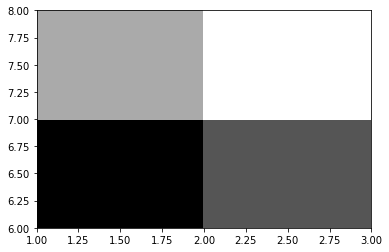

In [8]:
plt.pcolor([1,2,3], [6,7,8], aa, cmap='gist_gray')

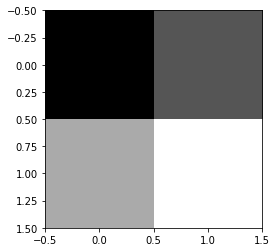

In [ ]:
plt.imshow(aa, cmap='gist_gray')

In [82]:
xx = np.ones(10)*1.999
yy = np.array([0, 0, 0, 3, 3, 4, 4, 4, 4, 4])

In [83]:
xx

array([1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999,
       1.999])

In [56]:
xbins = np.arange(4)
ybins = np.arange(-0.75, 6.5, 0.5)

In [57]:
ybins

array([-0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,
        3.75,  4.25,  4.75,  5.25,  5.75,  6.25])

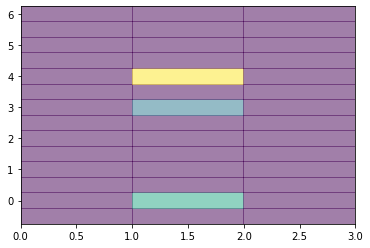

In [58]:
Hist = plt.hist2d(xx, yy, bins=[xbins, ybins], alpha = 0.5)

In [48]:
Hist[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 2., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

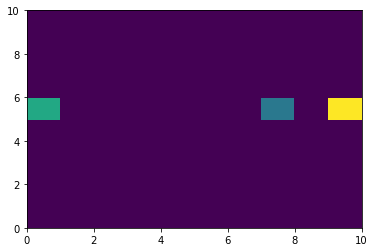

In [ ]:
plt.pcolor(Hist[0])

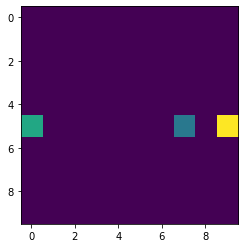

In [ ]:
plt.imshow(Hist[0])

In [103]:
xx = np.arange(0, 10, 0.01)
yy = np.sin(xx)

xbin = np.arange(-0.75, 10.3, 0.5)
ybin = np.arange(-1.7, 1.8, 0.2)

In [94]:
Noise1 = np.random.normal(scale = 0.2, size=1000)
Noise2 = np.random.normal(scale = 0.2, size=1000)

In [90]:
Noise.shape

(1000,)

In [87]:
xx.shape

(1000,)

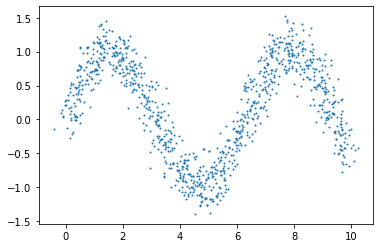

In [95]:
plt.scatter(xx+Noise1,yy+Noise2, s=1)

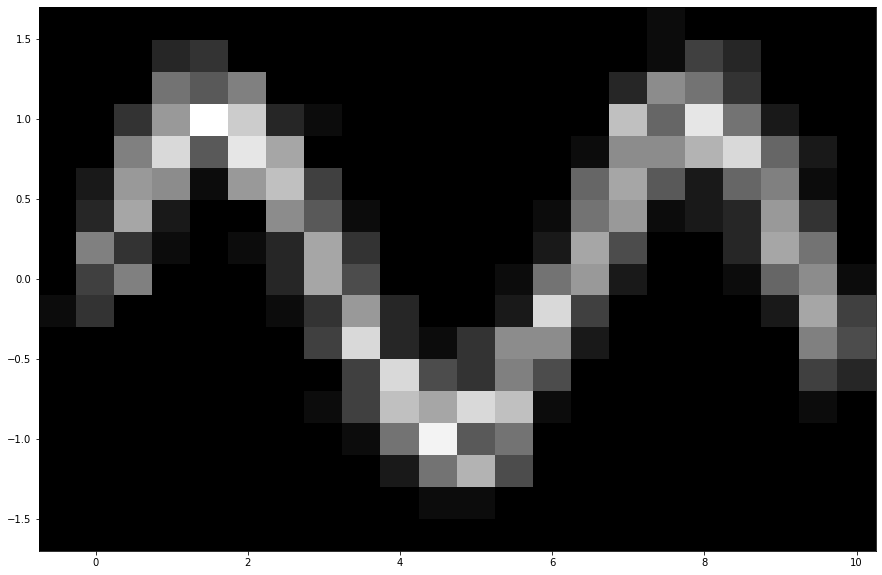

In [118]:
plt.figure(figsize=(15,10))
Hist = plt.hist2d(xx+Noise1,yy+Noise2, bins=[xbin, ybin], cmap='gist_gray')
# plt.colorbar()

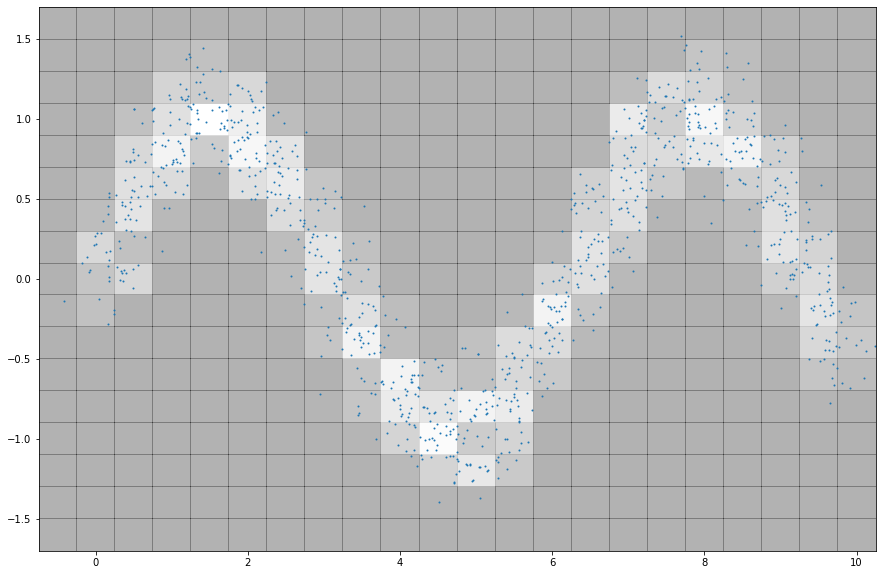

In [117]:
plt.figure(figsize=(15,10))
plt.pcolor(Hist[1], Hist[2], np.transpose(Hist[0]), cmap='gist_gray', alpha=0.3)
plt.scatter(xx+Noise1,yy+Noise2, s=1)

In [108]:
Hist

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 22., 22.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 34.,
         13.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         50.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,
         28.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 25., 12.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20., 21.,  9.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  8., 22., 20.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 33., 17.,  0.,  0.,  0.,  0.,  0., 